<a href="https://colab.research.google.com/github/malapakavivek/Exploratory_Data_Analysis/blob/main/EDA_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
listingdf = pd.read_csv("listings.csv")
listingdf.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [ ]:
listingdf.shape

(3818, 92)

In [ ]:
#all columns in the dataset
listingdf.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [ ]:
new_listing_df = listingdf[['name','id','host_id','host_response_rate', 'host_acceptance_rate','host_listings_count',
       'host_total_listings_count','street', 'neighbourhood', 'city', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'square_feet',
       'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'has_availability','cancellation_policy','instant_bookable']]

new_listing_df.head()

,name,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,street,neighbourhood,city,...,amenities,square_feet,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,cancellation_policy,instant_bookable
0,Stylish Queen Anne Apartment,241032,956883,96%,100%,3.0,3.0,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,Seattle,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,2,$5.00,1,365,t,moderate,f
1,Bright & Airy Queen Anne Apartment,953595,5177328,98%,100%,6.0,6.0,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,Seattle,...,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,1,$0.00,2,90,t,strict,f
2,New Modern House-Amazing water view,3308979,16708587,67%,100%,2.0,2.0,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,Seattle,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,10,$25.00,4,30,t,strict,f
3,Queen Anne Chateau,7421966,9851441,NaN,NaN,1.0,1.0,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,Seattle,...,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,$100.00,1,$0.00,1,1125,t,flexible,f
4,Charming craftsman 3 bdm house,278830,1452570,100%,NaN,2.0,2.0,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,Seattle,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$450.00,6,$15.00,1,1125,t,strict,f


In [ ]:
new_listing_df.shape

(3818, 31)

In [ ]:
#calculates all null values in the columns
new_listing_df.isnull().sum()

name                            0
id                              0
host_id                         0
host_response_rate            523
host_acceptance_rate          773
host_listings_count             2
host_total_listings_count       2
street                          0
neighbourhood                 416
city                            0
state                           0
zipcode                         7
smart_location                  0
country_code                    0
country                         0
property_type                   1
room_type                       0
accommodates                    0
bathrooms                      16
bedrooms                        6
beds                            1
amenities                       0
square_feet                  3721
price                           0
guests_included                 0
extra_people                    0
minimum_nights                  0
maximum_nights                  0
has_availability                0
cancellation_p

In [ ]:
new_listing_df["cancellation_policy"].unique()

array(['moderate', 'strict', 'flexible'], dtype=object)

In [ ]:
new_listing_df.dtypes

name                          object
id                             int64
host_id                        int64
host_response_rate            object
host_acceptance_rate          object
host_listings_count          float64
host_total_listings_count    float64
street                        object
neighbourhood                 object
city                          object
state                         object
zipcode                       object
smart_location                object
country_code                  object
country                       object
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
amenities                     object
square_feet                  float64
price                         object
guests_included                int64
extra_people                  object
minimum_nights                 int64
m

In [ ]:
new_listing_df['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [ ]:
new_listing_df['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

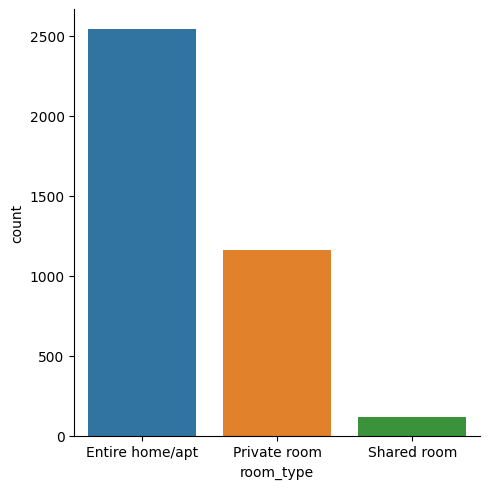

In [ ]:
sns.catplot(x = 'room_type', data = new_listing_df, kind ='count')

The above graph represents the count of each room type

In [ ]:
new_listing_df['accommodates'].value_counts()

2     1627
4      785
3      398
6      332
1      256
5      184
8      119
7       52
10      25
12      15
9       13
16       4
11       3
14       3
15       2
Name: accommodates, dtype: int64

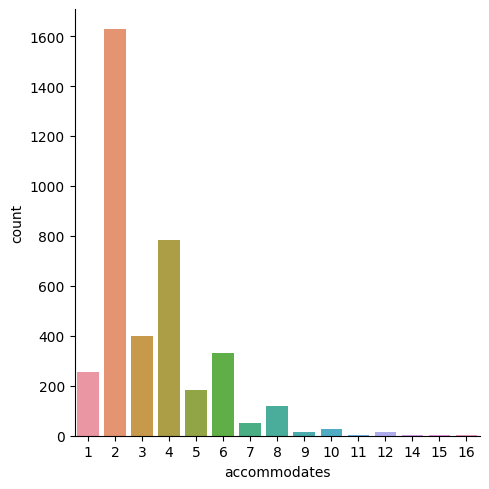

In [ ]:
sns.catplot(x = 'accommodates', data = new_listing_df, kind ='count')

Most number of hosts rents out their property for 2 people only

In [ ]:
new_listing_df['bathrooms'].value_counts()

1.0    2882
2.0     373
1.5     248
2.5     124
3.0      64
3.5      57
0.5      31
4.0       8
0.0       8
4.5       3
8.0       2
5.0       2
Name: bathrooms, dtype: int64

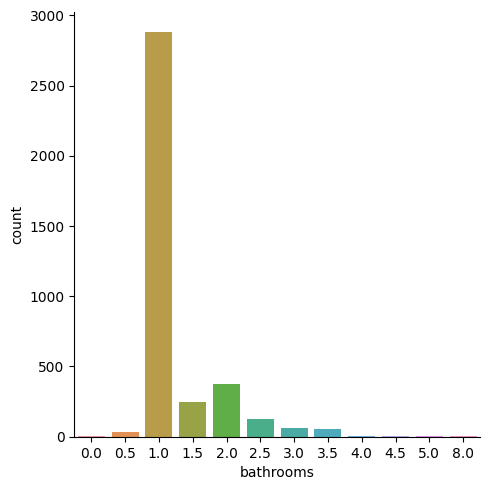

In [ ]:
sns.catplot(x = 'bathrooms', data = new_listing_df, kind ='count')

In [ ]:
new_listing_df['bedrooms'].value_counts()

1.0    2417
2.0     640
0.0     372
3.0     283
4.0      69
5.0      24
6.0       6
7.0       1
Name: bedrooms, dtype: int64

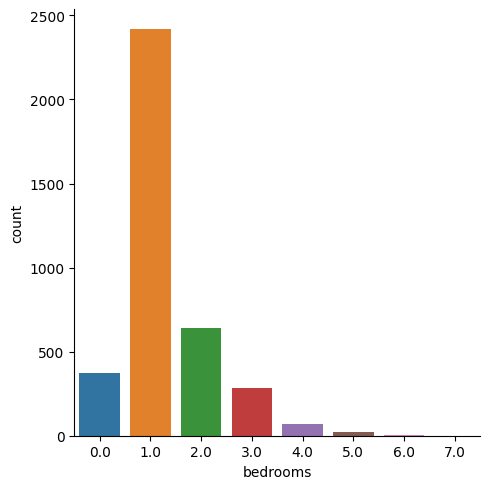

In [ ]:
sns.catplot(x = 'bedrooms', data = new_listing_df, kind ='count')

Most hosts rent out their property which has 1 bedroom

In [ ]:
new_listing_df['beds'].value_counts()

1.0     2201
2.0      912
3.0      433
4.0      152
5.0       73
6.0       21
7.0       14
9.0        4
8.0        4
10.0       2
15.0       1
Name: beds, dtype: int64

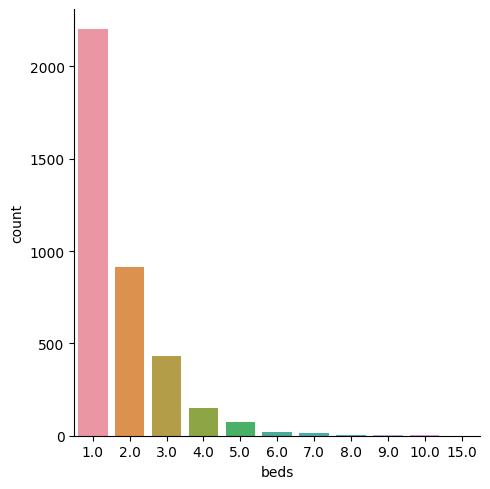

In [ ]:
sns.catplot(x = 'beds', data = new_listing_df, kind ='count')

In [ ]:
#converting prices datatype from object to int by replacing $ sign with ""
new_listing_df['price'] = new_listing_df['price'].str.replace('$', '').str.replace(',', '').str.split('.', expand=True)[0].astype(int)

<ipython-input-49-8c6b5d88452d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_listing_df['price'] = new_listing_df['price'].str.replace('$', '').str.replace(',', '').str.split('.', expand=True)[0].astype(int)
<ipython-input-49-8c6b5d88452d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_listing_df['price'] = new_listing_df['price'].str.replace('$', '').str.replace(',', '').str.split('.', expand=True)[0].astype(int)


<Axes: xlabel='property_type', ylabel='price'>

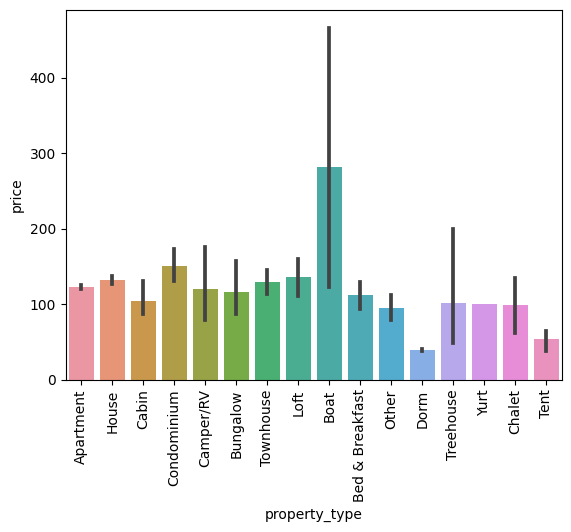

In [ ]:
g = sns.barplot(data=new_listing_df, x= 'property_type', y = 'price')
g.set_xticklabels(labels=['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent'], rotation=90)
g

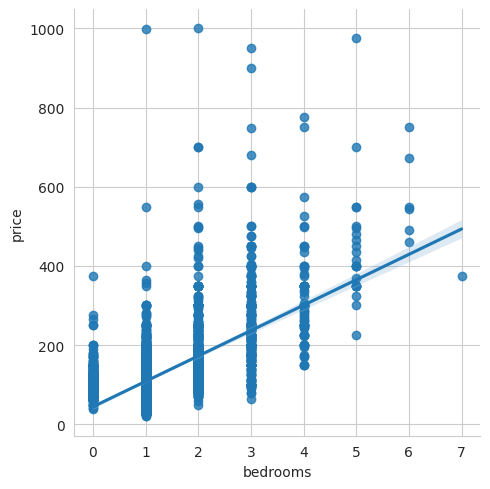

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x='bedrooms', y ='price', data = new_listing_df)

From the above graph we can come to a conclusion the price and bedrooms are directly propotional to each other, that is as the bedrooms in the property increases, the price also increases


<Axes: xlabel='room_type', ylabel='price'>

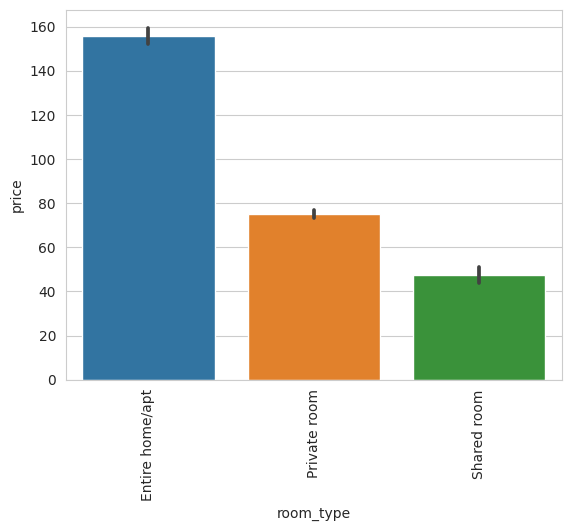

In [ ]:
d = sns.barplot(data=new_listing_df, x= 'room_type', y = 'price')
d.set_xticklabels(labels=['Entire home/apt', 'Private room', 'Shared room'], rotation=90)
d

This graph represents that an entire home/apt costs more than and private room and a shared room

<Axes: xlabel='room_type', ylabel='property_type'>

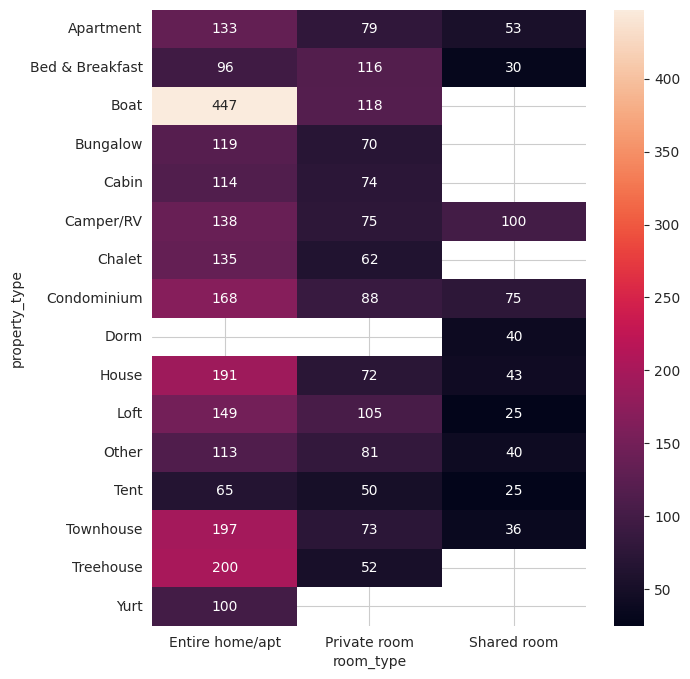

In [ ]:
plt.figure(figsize=(7,8))
sns.heatmap(new_listing_df.groupby(['property_type','room_type']).price.mean().unstack(),annot=True,fmt='.0f')

<Axes: xlabel='bedrooms', ylabel='property_type'>

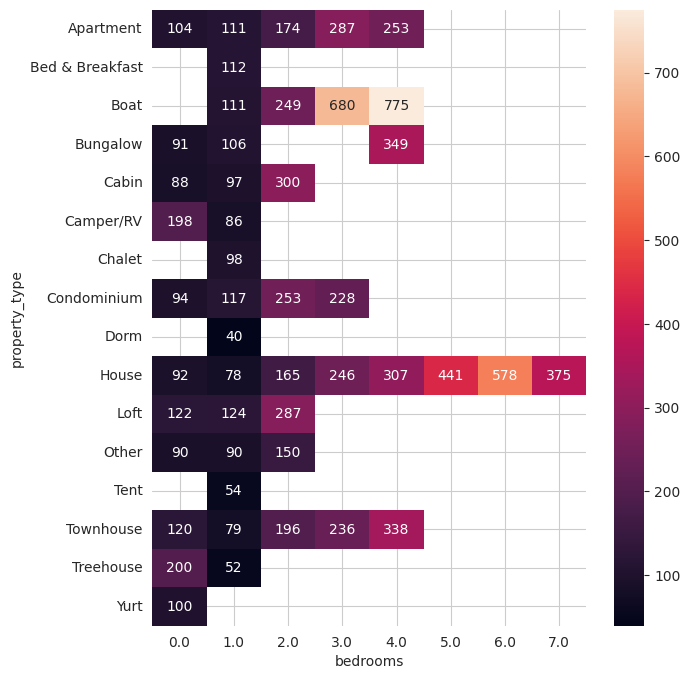

In [ ]:
plt.figure(figsize=(7,8))
sns.heatmap(new_listing_df.groupby(['property_type','bedrooms']).price.mean().unstack(),annot=True,fmt='.0f')

In [ ]:
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
# Create a dataframe of the words that appear in the ammenities section of the most expensive listings

amenities_df = new_listing_df[['amenities','price','id',]]
amenities_df_top50 = amenities_df.sort_values('price',ascending=[0])
amenities_df_top = amenities_df_top50.head(50)
allemenities = ''
for index,row in amenities_df_top50.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Tokenize the text
allemenities_data = word_tokenize(allemenities)

# Remove stopwords
filtered_data = [word for word in allemenities_data if word.lower() not in stopwords.words('english')]

# Lemmatization
wnl = WordNetLemmatizer()
allemenities_lemmatized = [wnl.lemmatize(data) for data in filtered_data]

# Join the lemmatized words
allemenities_words = ' '.join(allemenities_lemmatized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


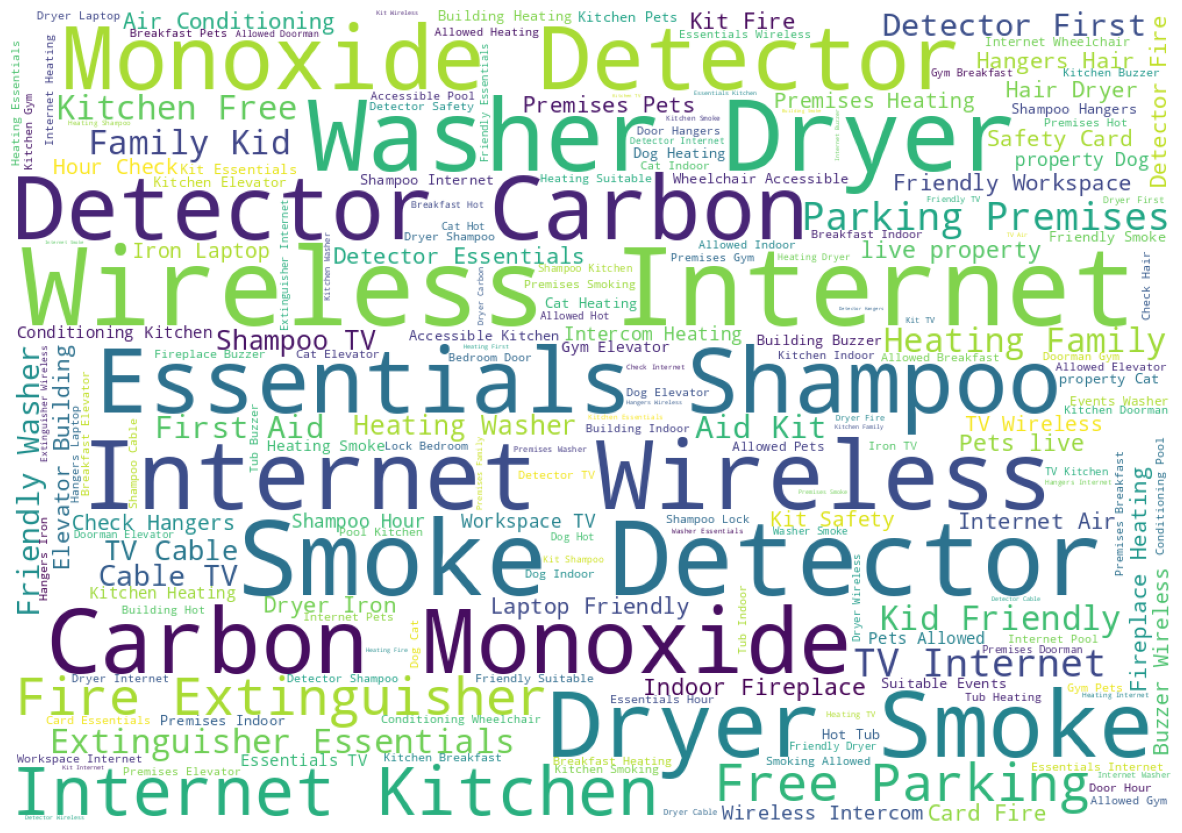

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The above graph represents the amenities included in the most expensive airbnb